<a href="https://colab.research.google.com/github/lcnature/PSY291/blob/main/PSY292_Ch12_ANOVA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Variance (ANOVA)

Let's take a look at an example from the textbook
Assume these are the data measuring the driving performance when participants have different ways of interacting with their phones: no phone, talking on a hand-held phone, or talking with hands-free phone.


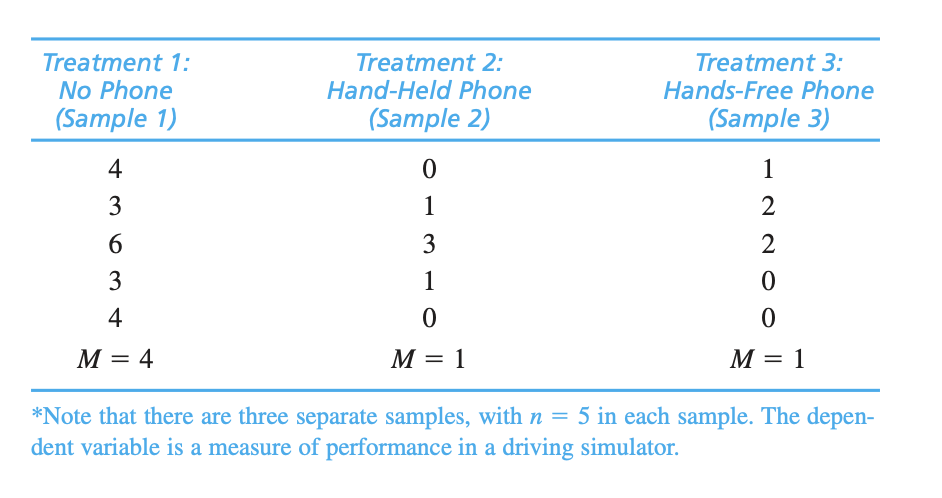

## specify the data

In [1]:
import numpy as np

X1 = np.asarray([4, 3, 6, 3, 4])
X2 = np.asarray([0, 1, 3, 1, 0])
X3 = np.asarray([1, 2, 2, 0, 0])

## Formula for calculating F-ratio, the ratio of variances

We want to know whether the three conditions produce any difference in driving performance in the general population

To perform ANOVA, we need to calculate

$F = \frac{s^2_{between\ treatments}}{s^2_{within\ treatments}}$



### Calculating between-treatments variance

For $s^2_{between\ treatments}$, we can use the following formula to calculate the sum of squared residuals:

$s^2_{between\ treatments} = \frac{SS_{between\ treatmetns}}{df_{between\ treatments}}$

To calculate the sum of squred residuals $SS_{between\ treatmetns}$, we basically treat the mean of each group of participants as a "representative" of that participants and replace his/her score to calculate the squared residuals against the total mean.

The formula would be:

$SS_{between} = \Sigma_i^k n_i (M_i - \bar{M}) ^2$

Here, $n_i$ is the size of each group, which is 5.

$X_{ij}$ is the j-th score in the i-th group.
For example, $X_{1,3}=6$, $X_{2,2}=2$,  




In [2]:


# We need to calculate the mean of all the score

# let's make an array containing all the scores
X_all = np.concatenate([X1, X2, X3])

M_all = np.mean(X_all)

# Alternatively, we could take the sum of each group to get the sum of them all first
sum_all = np.sum(X1) + np.sum(X2) + np.sum(X3)
M_all = sum_all / (np.size(X1) + np.size(X2) + np.size(X3))

# We also need to calculate the mean of each group:
M1 = np.mean(X1)
M2 = np.mean(X2)
M3 = np.mean(X3)

# Then the SS would be:
n = 5
SS_between = ((M1 - M_all) ** 2 + (M2 - M_all) ** 2
 + (M3 - M_all) ** 2) * 5

print('mean of all participants: ', M_all)
print('SS_between:', SS_between)



mean of all participants:  2.0
SS_between: 30.0


Because there are 3 groups, The degre of freedom for calculating $s^2_{between}$ would b 3-1=2

In [ ]:
k = 3
df_between = k - 1
s2_between = SS_between / df_between
print('degree of freedom between treatmetns:', df_between)
print('between-treatments variance:', s2_between)

### within-treatments variance
The idea is to pool over the summed squred residuals in each group together, and divide by their total degree of freedom (number of effective counts of variation due to randomnes across participants)

$s^2_{within} = \frac{SS_{within}}{df_{within}}$

$SS_{within} = \Sigma_i^k SS_i = \Sigma_i^k (X_{ij}-M_i)^2$



In [ ]:
SS_1 = np.sum((X1 - np.mean(X1)) ** 2)
# ** 2 means raising to the power of 2, which is calculating the square

SS_2 = np.sum((X2 - np.mean(X2)) ** 2)
SS_3 = np.sum((X3 - np.mean(X3)) ** 2)

SS_within = SS_1 + SS_2 + SS_3


print('SS_within:', SS_within)

degree of freedom for within-treatments variance is the sum of degree of freedom within each group

$df_{within} = \Sigma_i^k df_i $

We reduce the degree of freedom each time we calculate a mean.
Because we have calculated a mean for each group in order to calculate its variance, we reduce k=3 degrees of freedom in total.

So the degree of freedom can also be calculated as
$df_{within} = n - k$

In [ ]:
n_i = 5 # size of each group
df_within = (n_i - 1) * k

s2_within = SS_within / df_within

print('within-treatments degree of freedom:', df_within)
print('within-treatments variance:', s2_within)


### Finally, the F-ratio

$F = \frac{s^2_{between\ treatments}}{s^2_{within\ treatments}}$

In [ ]:
F = s2_between / s2_within
print('F-ratio of the ANOVA:', F)

# Your task
## alternative way to calculate $SS_{between}$
We can alternatively calculate the between-treatments variability as the difference between the total variability minus the within-treatments variability.

$SS_{between} = SS_{total} - SS_{within}$.

We have already made an array containing all the scores across the tree groups, `X_all`. Can you calculate $SS_{total}$ and then obtain $SS_{between}$ using the formula above, to verify if the two results match?



NumPy has a function to calculate variance already:  [`np.var`](https://numpy.org/doc/stable/reference/generated/numpy.var.html).

Wouldn't it be nice to calculate the between-treatments and within-treatments just using this function?

This sounds simple but is slightly non-trivial. Try yourself how to get the same F ratio using this approach.